In [71]:
import pandas as pd
df=pd.read_csv('dataset/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.drop('CustomerID',axis=1,inplace=True)

In [4]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [5]:
from sklearn.preprocessing import OrdinalEncoder
ordinal=OrdinalEncoder()
df['Gender']=ordinal.fit_transform(df['Gender'].values.reshape(-1,1))
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,19,15,39
1,1.0,21,15,81
2,0.0,20,16,6
3,0.0,23,16,77
4,0.0,31,17,40
...,...,...,...,...
195,0.0,35,120,79
196,0.0,45,126,28
197,1.0,32,126,74
198,1.0,32,137,18


In [6]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++', n_init='warn',)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
wcss

C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

[308862.06,
 212889.44245524297,
 143391.5923603568,
 104414.67534220166,
 75399.61541401484,
 58348.64136331505,
 51181.511473820305,
 44357.6215098352,
 40674.154550504914]

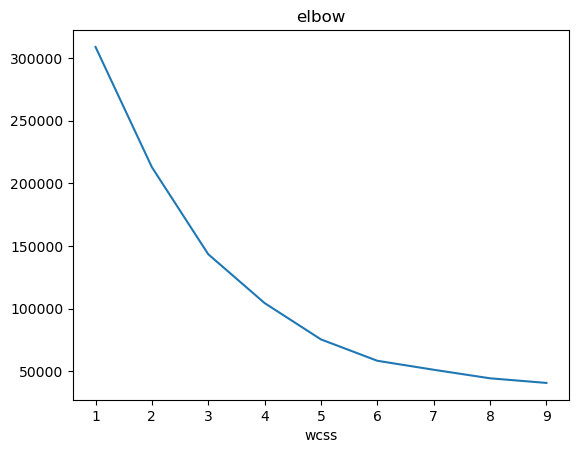

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(1,10),wcss)
plt.title('elbow')
plt.xlabel('k cluster')
plt.xlabel("wcss")
plt.show()

In [8]:
kmeans=KMeans(n_clusters=5,init='k-means++', n_init='warn',)
kmeans.fit(df)
pred_value=kmeans.predict(df)

C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
pred_value

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [11]:
kmeans.cluster_centers_ #centroid

array([[ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739]])

In [14]:
dfvalues=df.values

In [13]:
len(pred_value)

200

In [15]:
dfvalues

array([[  1.,  19.,  15.,  39.],
       [  1.,  21.,  15.,  81.],
       [  0.,  20.,  16.,   6.],
       [  0.,  23.,  16.,  77.],
       [  0.,  31.,  17.,  40.],
       [  0.,  22.,  17.,  76.],
       [  0.,  35.,  18.,   6.],
       [  0.,  23.,  18.,  94.],
       [  1.,  64.,  19.,   3.],
       [  0.,  30.,  19.,  72.],
       [  1.,  67.,  19.,  14.],
       [  0.,  35.,  19.,  99.],
       [  0.,  58.,  20.,  15.],
       [  0.,  24.,  20.,  77.],
       [  1.,  37.,  20.,  13.],
       [  1.,  22.,  20.,  79.],
       [  0.,  35.,  21.,  35.],
       [  1.,  20.,  21.,  66.],
       [  1.,  52.,  23.,  29.],
       [  0.,  35.,  23.,  98.],
       [  1.,  35.,  24.,  35.],
       [  1.,  25.,  24.,  73.],
       [  0.,  46.,  25.,   5.],
       [  1.,  31.,  25.,  73.],
       [  0.,  54.,  28.,  14.],
       [  1.,  29.,  28.,  82.],
       [  0.,  45.,  28.,  32.],
       [  1.,  35.,  28.,  61.],
       [  0.,  40.,  29.,  31.],
       [  0.,  23.,  29.,  87.],
       [  

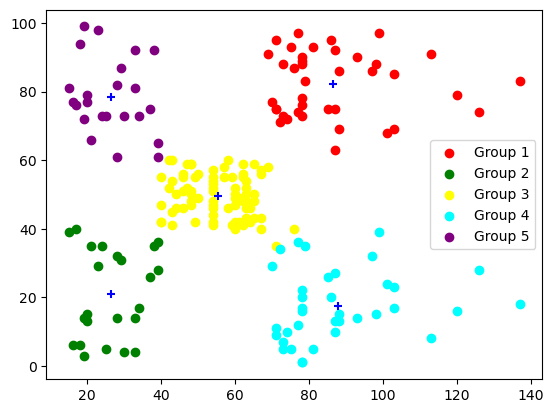

In [19]:
import matplotlib.pyplot as plt
plt.scatter(dfvalues[pred_value==0,2],dfvalues[pred_value==0,3],color='red',label='Group 1')
plt.scatter(dfvalues[pred_value==1,2],dfvalues[pred_value==1,3],color='green',label='Group 2')
plt.scatter(dfvalues[pred_value==2,2],dfvalues[pred_value==2,3],color='yellow',label='Group 3')
plt.scatter(dfvalues[pred_value==3,2],dfvalues[pred_value==3,3],color='cyan',label='Group 4')
plt.scatter(dfvalues[pred_value==4,2],dfvalues[pred_value==4,3],color='purple',label='Group 5')
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],color='blue',marker='+')
plt.legend()
plt.show()

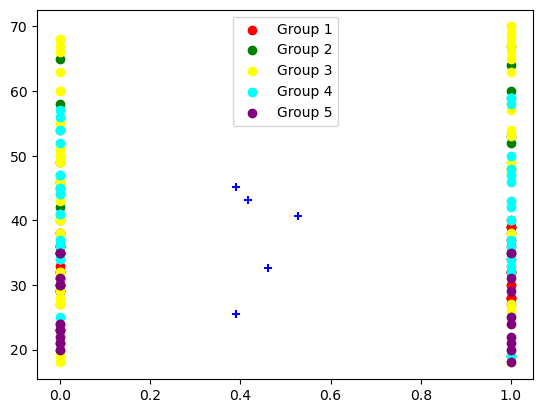

In [20]:
import matplotlib.pyplot as plt
plt.scatter(dfvalues[pred_value==0,0],dfvalues[pred_value==0,1],color='red',label='Group 1')
plt.scatter(dfvalues[pred_value==1,0],dfvalues[pred_value==1,1],color='green',label='Group 2')
plt.scatter(dfvalues[pred_value==2,0],dfvalues[pred_value==2,1],color='yellow',label='Group 3')
plt.scatter(dfvalues[pred_value==3,0],dfvalues[pred_value==3,1],color='cyan',label='Group 4')
plt.scatter(dfvalues[pred_value==4,0],dfvalues[pred_value==4,1],color='purple',label='Group 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='blue',marker='+')
plt.legend()
plt.show()

In [21]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [22]:
df=df.drop(columns=['Gender','Age'],axis=1)

In [23]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [28]:
kmeans=KMeans(n_clusters=6,init='k-means++', n_init='warn',)
kmeans.fit(df)
pred_value=kmeans.predict(df)

C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
dfvalues=df.values

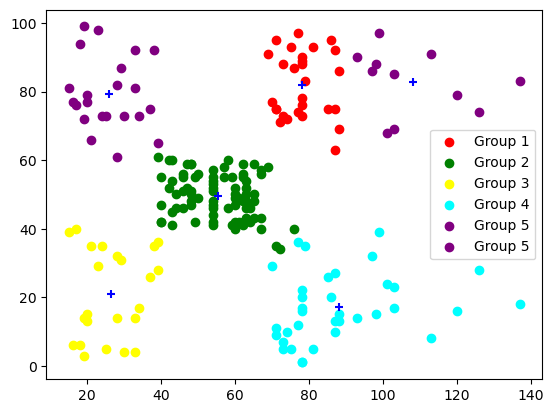

In [31]:
import matplotlib.pyplot as plt
plt.scatter(dfvalues[pred_value==0,0],dfvalues[pred_value==0,1],color='red',label='Group 1')
plt.scatter(dfvalues[pred_value==1,0],dfvalues[pred_value==1,1],color='green',label='Group 2')
plt.scatter(dfvalues[pred_value==2,0],dfvalues[pred_value==2,1],color='yellow',label='Group 3')
plt.scatter(dfvalues[pred_value==3,0],dfvalues[pred_value==3,1],color='cyan',label='Group 4')
plt.scatter(dfvalues[pred_value==4,0],dfvalues[pred_value==4,1],color='purple',label='Group 5')
plt.scatter(dfvalues[pred_value==5,0],dfvalues[pred_value==5,1],color='purple',label='Group 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='blue',marker='+')
plt.legend()
plt.show()

In [33]:
df["label"]=pred_value

In [34]:
df

,Annual Income (k$),Spending Score (1-100),label
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2
...,...,...,...
195,120,79,5
196,126,28,3
197,126,74,5
198,137,18,3


In [39]:
df[df['label']==1].index

Int64Index([ 43,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
             58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
             71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
             84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
             97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
            110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
            126, 132, 142],
           dtype='int64')

In [40]:
df[df['label']==0].index

Int64Index([123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147,
            149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173,
            175, 177],
           dtype='int64')

In [41]:
df[df['label']==2].index

Int64Index([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
            34, 36, 38, 40, 42, 44],
           dtype='int64')

In [42]:
df[df['label']==3].index

Int64Index([124, 128, 130, 134, 136, 138, 140, 144, 146, 148, 150, 152, 154,
            156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
            182, 184, 186, 188, 190, 192, 194, 196, 198],
           dtype='int64')

In [43]:
df[df['label']==4].index

Int64Index([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
            35, 37, 39, 41, 45],
           dtype='int64')

In [44]:
df[df['label']==5].index

Int64Index([179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199], dtype='int64')

In [45]:
df=pd.read_csv('dataset/Live.csv')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [46]:
df.Column1.value_counts()

Series([], Name: Column1, dtype: int64)

In [48]:
df=df.drop(columns=['Column1','Column2','Column3','Column4'])
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [51]:
X=df.drop(columns=['status_id','status_type','status_published'])
y=df['status_type']

In [52]:
X

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,0
7048,351,12,22,349,2,0,0,0,0


In [53]:
X.dtypes

num_reactions    int64
num_comments     int64
num_shares       int64
num_likes        int64
num_loves        int64
num_wows         int64
num_hahas        int64
num_sads         int64
num_angrys       int64
dtype: object

In [54]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++', n_init='warn',)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[8645685934.94042,
 4986391851.630913,
 2735257865.11144,
 2002148245.8462842,
 1469924068.9419374,
 1186920795.32415,
 923401369.8993888,
 749942057.4507222,
 621445590.8017766]

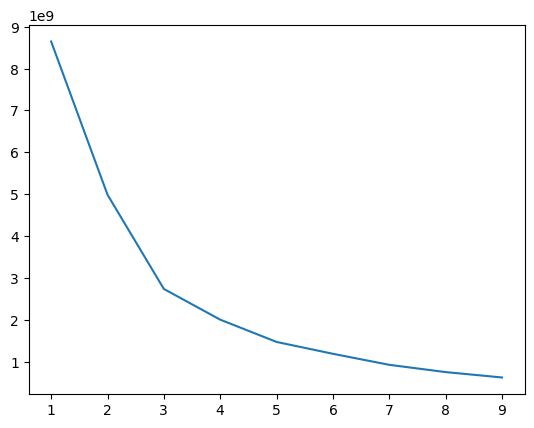

In [55]:
plt.plot(range(1,10),wcss)
plt.show()

In [65]:
kmeans=KMeans(n_clusters=2,init='k-means++', n_init='warn',)
kmeans.fit(X)
y_pred=kmeans.predict(X)
y_pred

C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [66]:
dfvalues=X.values

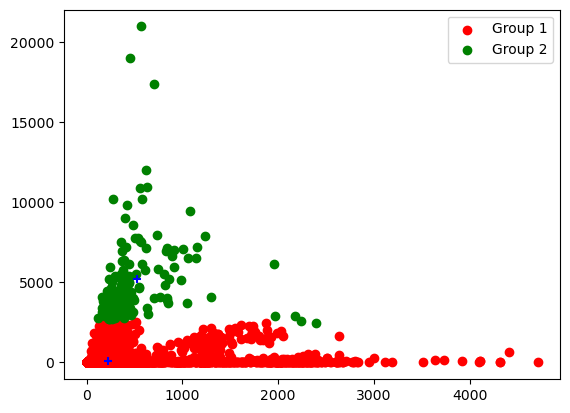

In [67]:
import matplotlib.pyplot as plt
plt.scatter(dfvalues[y_pred==0,0],dfvalues[y_pred==0,1],color='red',label='Group 1')
plt.scatter(dfvalues[y_pred==1,0],dfvalues[y_pred==1,1],color='green',label='Group 2')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='blue',marker='+')
plt.legend()
plt.show()

In [64]:
X

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,0
7048,351,12,22,349,2,0,0,0,0


In [70]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


<Axes: xlabel='Age', ylabel='Density'>

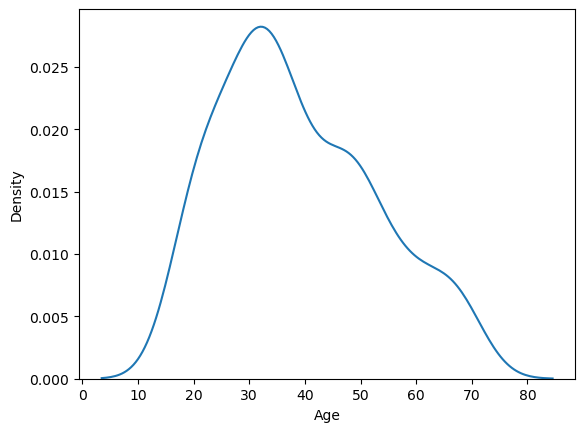

In [74]:
import seaborn as sns
sns.kdeplot(x='Age',data=df)

<Axes: xlabel='Age'>

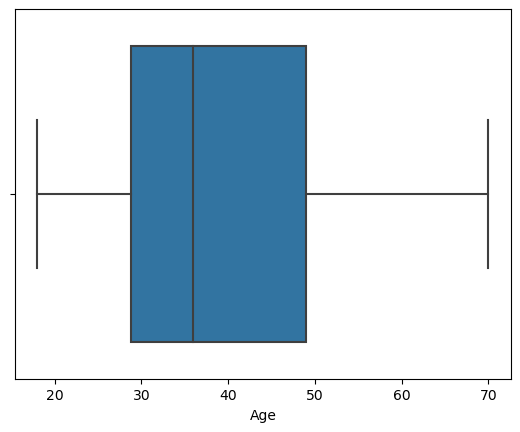

In [75]:
sns.boxplot(x='Age',data=df)

In [79]:
df=pd.read_csv('dataset/pulsar_data_train.csv')
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [80]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [81]:
df['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [83]:
zerodf=df[df['target_class']==0.0].sample(1153)

In [84]:
onedf=df[df['target_class']==1.0]

In [85]:
zerodf

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
1948,121.671875,39.211587,0.002546,0.947044,3.461538,23.243786,7.258006,54.638888,0.0
2520,139.304688,41.681935,NaN,0.462718,1.086120,10.170870,16.445285,351.329011,0.0
5180,115.359375,50.379456,0.285947,-0.097737,3.963211,25.344786,6.849678,47.931441,0.0
4316,97.218750,43.081307,0.473589,0.725725,1.484114,14.872948,12.610224,175.176577,0.0
9326,126.398438,49.089099,0.133203,-0.201082,4.066054,NaN,7.035203,52.866144,0.0
...,...,...,...,...,...,...,...,...,...
920,127.859375,43.494923,-0.125393,-0.038133,21.301003,57.968981,2.515394,4.780337,0.0
7666,102.351562,56.700913,0.820094,0.209103,146.215719,57.492375,-0.941289,1.461150,0.0
12208,101.843750,41.385844,0.305102,0.604504,2.785953,20.628122,9.300134,93.723051,0.0
7451,123.781250,77.455727,0.041693,-1.308233,130.477425,88.465308,-0.513741,-1.345418,0.0


In [86]:
onedf

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
31,36.710938,38.260242,4.363307,20.296980,107.212375,74.621195,0.115883,-0.819638,1.0
34,43.500000,28.491227,4.334565,26.339870,39.585284,75.533411,1.706102,1.403352,1.0
40,66.851562,58.088038,1.802132,2.232983,67.020903,80.612872,0.841740,-0.637752,1.0
68,69.210938,35.257236,1.093096,4.435122,2.345318,20.200260,9.389613,91.750817,1.0
73,126.554688,45.013333,0.380318,0.308553,4.983278,28.880935,5.938614,34.917943,1.0
...,...,...,...,...,...,...,...,...,...
12449,96.679688,38.567095,NaN,1.523007,70.403010,71.441850,0.200442,-1.644414,1.0
12455,85.960938,44.783228,NaN,1.427599,35.621237,66.816497,1.617706,1.105883,1.0
12482,55.484375,39.566397,2.696052,9.306845,46.076923,76.216779,1.555005,1.007750,1.0
12515,62.164062,45.520562,2.438793,6.897894,16.846154,49.432834,3.102149,8.877464,1.0


In [88]:
df=pd.concat([zerodf,onedf])
len(df)

2306

In [89]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
1948,121.671875,39.211587,0.002546,0.947044,3.461538,23.243786,7.258006,54.638888,0.0
2520,139.304688,41.681935,NaN,0.462718,1.086120,10.170870,16.445285,351.329011,0.0
5180,115.359375,50.379456,0.285947,-0.097737,3.963211,25.344786,6.849678,47.931441,0.0
4316,97.218750,43.081307,0.473589,0.725725,1.484114,14.872948,12.610224,175.176577,0.0
9326,126.398438,49.089099,0.133203,-0.201082,4.066054,NaN,7.035203,52.866144,0.0
...,...,...,...,...,...,...,...,...,...
12449,96.679688,38.567095,NaN,1.523007,70.403010,71.441850,0.200442,-1.644414,1.0
12455,85.960938,44.783228,NaN,1.427599,35.621237,66.816497,1.617706,1.105883,1.0
12482,55.484375,39.566397,2.696052,9.306845,46.076923,76.216779,1.555005,1.007750,1.0
12515,62.164062,45.520562,2.438793,6.897894,16.846154,49.432834,3.102149,8.877464,1.0


In [94]:
df.isnull().any()

 Mean of the integrated profile                  False
 Standard deviation of the integrated profile    False
 Excess kurtosis of the integrated profile        True
 Skewness of the integrated profile              False
 Mean of the DM-SNR curve                        False
 Standard deviation of the DM-SNR curve           True
 Excess kurtosis of the DM-SNR curve             False
 Skewness of the DM-SNR curve                     True
target_class                                     False
dtype: bool

In [95]:
len(df)

2306

In [97]:
df.dropna(inplace=True)

In [98]:
X=df.drop('target_class',axis=1)
y=df['target_class']

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15,shuffle=True)
x_train.shape,y_train.shape

((1456, 8), (1456,))

In [100]:
from sklearn.linear_model import LogisticRegression
lrd=LogisticRegression()
lrd.fit(x_train,y_train)
y_pred=lrd.predict(x_test)

from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(lrd,x_train,y_train,cv=5).max()
cv_scores

C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

0.9450171821305842

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(knn,x_train,y_train,cv=5).max()
cv_scores

0.9175257731958762

In [116]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [117]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
abc =AdaBoostClassifier(n_estimators=50, base_estimator=lrd,learning_rate=1)
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test)
scores=cross_val_score(abc,x_train,y_train,cv=5).mean()
print("Accuracy:",scores)

C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Accuracy: 0.9285764722496823


In [121]:
df=pd.read_csv('dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [122]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [123]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15,shuffle=True)
x_train.shape,y_train.shape

((652, 8), (652,))

In [126]:
lrd=LogisticRegression()
lrd.fit(x_train,y_train)
y_pred=lrd.predict(x_test)

from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(lrd,x_train,y_train,cv=5).max()
cv_scores

C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

0.8091603053435115

In [128]:
abc =AdaBoostClassifier(n_estimators=50, learning_rate=1)
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test)
scores=cross_val_score(abc,x_train,y_train,cv=5).mean()
print("Accuracy:",scores)

Accuracy: 0.7790722254844391


In [129]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(knn,x_train,y_train,cv=5).max()
cv_scores

0.7538461538461538

In [ ]:
#Logistic Regression + Adaboost  (heart.csv --- webapps  + 1 work)
#Linear Regression + Adaboost   (loan prediction -- linear/lo)
